# Importing and Loading packages

### First, we need to install the package "here" so that we can call all mudules without thinking about path. 

### Then, we can load and install the rest of the packages from the file module.R 


In [ ]:
# install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

# Importing and Exploring the Dataset

In [135]:
before_dataset <- read_excel(path = here('Data','before_pa.xlsx'))
before_dataset <- data.frame(before_dataset)
dim(before_dataset)
head(before_dataset)


[1] 1255   77

,sex,age_range,martialStatus,state,zone,co.resident_range,rooms_range,income_range,scholarity,diabetes,...,PA_easiness_others_before,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_practice_during
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,25,2,1,1,4,4,0,...,0,0,0,0,0,1,0,0,0,1
2,2,3,1,21,1,2,3,6,4,0,...,0,0,1,0,0,0,0,0,0,0
3,1,3,1,21,1,2,2,5,3,0,...,0,0,0,0,1,0,0,0,0,0
4,1,3,1,21,1,1,1,3,4,0,...,0,0,0,0,0,1,0,0,0,0
5,1,2,2,25,2,2,2,6,4,0,...,0,1,0,0,0,0,0,0,0,0
6,2,3,2,21,1,2,2,6,6,0,...,0,1,0,0,0,0,0,0,0,0


### As we expected, R is interpreting almost all variables as numerical data

In [136]:
unique(sapply(before_dataset, class))

[1] "numeric"

# Treating missing data

### As the dataset had little missing data, we chose to omit them

In [137]:
before_dataset <- before_dataset[complete.cases(before_dataset),]
dim(before_dataset)


[1] 1242   77

# Treating variables type

### First we should interpret all variables as factors, then we can apply a different logic for the ordinal ones 

In [138]:
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 0] <- "practice"
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 1] <- "dont_practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 0] <- "practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 1] <- "dont_practice"


before_dataset$PA_intensity_before[before_dataset$PA_intensity_before == 4] <- "0"

before_dataset$PA_duration_before[before_dataset$PA_duration_before == 5] <- "0"



before_dataset[] <- lapply(before_dataset, as.factor)

before_dataset[1190:1200, c("PA_duration_before", "PA_intensity_before")]

,PA_duration_before,PA_intensity_before
,<fct>,<fct>
1203,2,2
1204,1,2
1205,0,0
1206,3,3
1207,3,2
1208,3,2
1209,2,2
1210,2,2
1211,1,3


In [139]:
ordinal_columns = c(
    'age_range',
    'rooms_range',
    'income_range',
    'scholarity',
    'sedentary_time_range_before',
    'co.resident_range',
    "PA_weekly_frequency_before",
    'PA_intensity_before',
    'PA_duration_before'
    
)
before_dataset[, ordinal_columns] <- lapply(before_dataset[, ordinal_columns], as.integer)



before_dataset[1, 2] < before_dataset[2, 2] 
head(before_dataset[, ordinal_columns])

[1] TRUE

,age_range,rooms_range,income_range,scholarity,sedentary_time_range_before,co.resident_range,PA_weekly_frequency_before,PA_intensity_before,PA_duration_before
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,4,3,4,1,4,2,3
2,3,3,6,3,3,2,3,3,4
3,3,2,5,2,1,2,2,4,3
4,3,1,3,3,2,1,4,4,4
5,2,2,6,3,4,2,4,4,4
6,3,2,6,5,2,2,3,3,3


# Sanity Check

### More then one column have the class "dont_practice", we need to check if they agree

In [140]:
table(before_dataset[, c("PA_practice_before", "PA_duration_before")])
table(before_dataset[, c("PA_practice_before", "PA_intensity_before")])
table(before_dataset[, c("PA_practice_before", "PA_weekly_frequency_before")])


                  PA_duration_before
PA_practice_before   1   2   3   4   5
     dont_practice 131   8   4   2   0
     practice        4  60 654 324  55

                  PA_intensity_before
PA_practice_before   1   2   3   4
     dont_practice 131  14   0   0
     practice        2 148 590 357

                  PA_weekly_frequency_before
PA_practice_before   1   2   3   4
     dont_practice 144   0   1   0
     practice        2 424 473 198

In [141]:
differ_dp <- ( before_dataset$PA_duration_before != 1 | before_dataset$PA_intensity_before != 1 | before_dataset$PA_weekly_frequency_before != 1 ) 
strange_dp <- before_dataset$PA_practice_before == "dont_practice" & differ_dp 
dim(before_dataset[strange_dp, ])
before_dataset <- before_dataset[!strange_dp,]

[1] 15 77

In [142]:
differ_p <- before_dataset$PA_duration_before == 1 | before_dataset$PA_intensity_before == 1 | before_dataset$PA_weekly_frequency_before == 1
strange_p <- before_dataset$PA_practice_before == "practice" & differ_p
dim(before_dataset[strange_p, ])
before_dataset <- before_dataset[!strange_p,]


[1]  6 77

### We found out that some columns have bias

In [144]:
lapply(before_dataset, levels)[c("DA", "DP", "state", "zone")]

before_dataset <- subset(before_dataset, select = -c(DA, DP, state, zone))

$DA
[1] "0"

$DP
[1] "0"

$state
 [1] "1"  "2"  "3"  "5"  "6"  "7"  "8"  "9"  "10" "13" "14" "15" "16" "17" "19"
[16] "20" "21" "22" "23" "24" "25" "26"

$zone
[1] "1" "2" "3" "4" "5"

# Finnaly apply the model


In [145]:
summary(before_dataset[, ncol(before_dataset)])

dont_practice      practice 
          337           884

In [146]:
set.seed(2)
lista_treino <- createDataPartition(before_dataset$PA_practice_during, p=0.7, list=FALSE)
treino <- before_dataset[lista_treino,]
teste <- before_dataset[-lista_treino,]

CART 

855 samples
 72 predictor
  2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 855, 855, 855, 855, 855, 855, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01271186  0.7271390  0.2131784
  0.01694915  0.7315722  0.2124227
  0.02966102  0.7333800  0.1754339
  0.03813559  0.7292694  0.1697857
  0.04661017  0.7255472  0.1329453

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01271186.


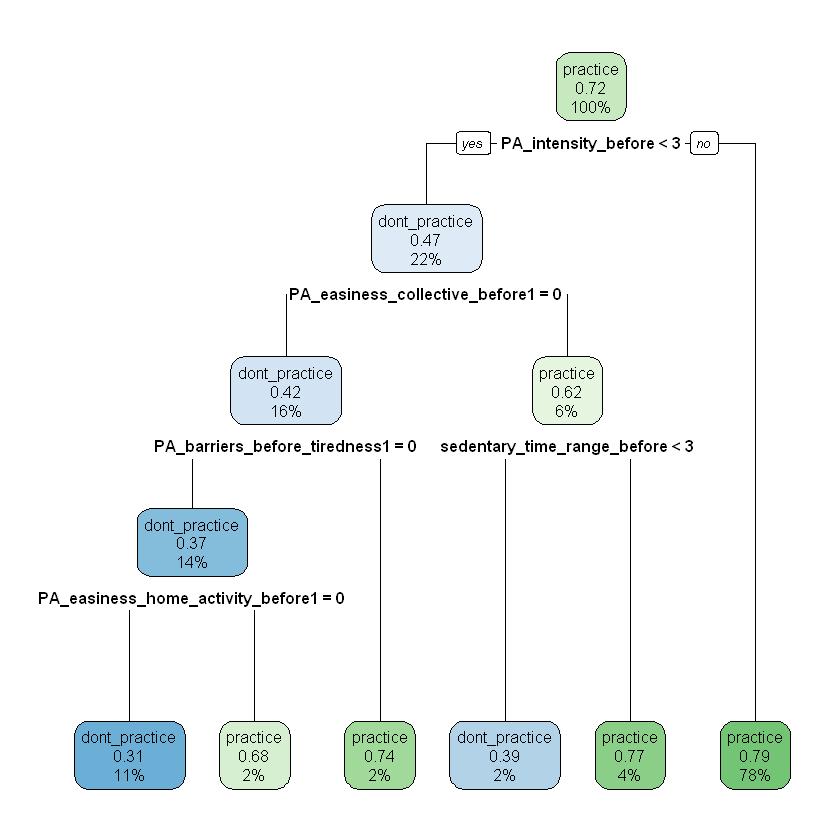

In [147]:
form = as.formula(paste("PA_practice_during",'~.'))
modelo <<- train(form , data=treino, method="rpart", metric="Kappa", trControl = trainControl(method = "boot"), tuneLength = 5)
print(modelo)
pred <<- predict(modelo, teste)
confM <<- confusionMatrix(pred, teste[,ncol(before_dataset)])
rpart.plot(modelo$finalModel)

In [148]:
print(confM)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            32       23
  practice                 69      242
                                          
               Accuracy : 0.7486          
                 95% CI : (0.7009, 0.7923)
    No Information Rate : 0.724           
    P-Value [Acc > NIR] : 0.1601          
                                          
                  Kappa : 0.2678          
                                          
 Mcnemar's Test P-Value : 2.711e-06       
                                          
            Sensitivity : 0.31683         
            Specificity : 0.91321         
         Pos Pred Value : 0.58182         
         Neg Pred Value : 0.77814         
             Prevalence : 0.27596         
         Detection Rate : 0.08743         
   Detection Prevalence : 0.15027         
      Balanced Accuracy : 0.61502         
                                          
       '

In [149]:
treino.aug <<- treino

n = nrow(treino[treino["PA_practice_during"]=="practice",]) - nrow(treino[treino["PA_practice_during"]=="dont_practice",])
print(n)
j=1
while(j<n){
  cand = GenerateMultipleCandidates(data=treino, Class="dont_practice", col=ncol(before_dataset), Prob=0.9, amount=1)
  if(!anyNA(cand)){
    treino.aug <<- rbind(treino.aug, cand)
    j=j+1
  }
}


[1] 383


In [150]:
summary(treino.aug[, "PA_practice_during"]) 

dont_practice      practice 
          618           619

CART 

1237 samples
  72 predictor
   2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1237, 1237, 1237, 1237, 1237, 1237, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.009708738  0.7807347  0.5608914
  0.045307443  0.7100287  0.4202063
  0.066343042  0.6855978  0.3701115
  0.171521036  0.6424964  0.2837597
  0.281553398  0.5933965  0.1966888

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.009708738.


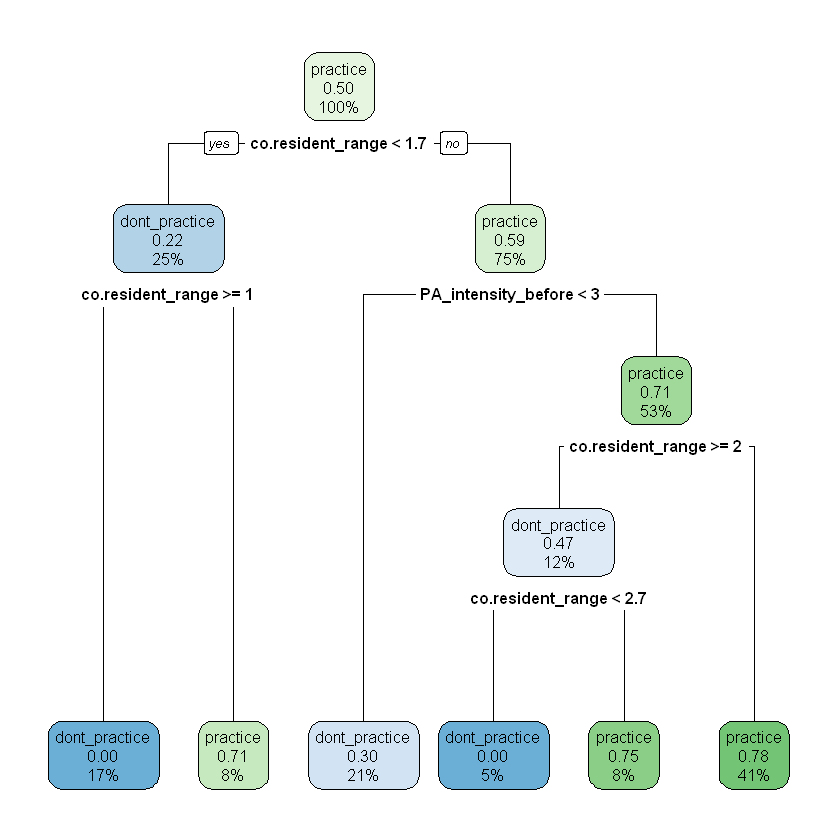

In [151]:
form = as.formula(paste("PA_practice_during",'~.'))
modelo.aug <<- train(form , data=treino.aug, method="rpart", metric="Kappa", trControl = trainControl(method = "boot"), tuneLength = 5)
print(modelo.aug)
pred.aug <<- predict(modelo.aug, teste)
confM.aug <<- confusionMatrix(pred.aug, teste[,ncol(before_dataset)])


rpart.plot(modelo.aug$finalModel)

In [152]:
print(confM.aug)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            46       40
  practice                 55      225
                                          
               Accuracy : 0.7404          
                 95% CI : (0.6923, 0.7846)
    No Information Rate : 0.724           
    P-Value [Acc > NIR] : 0.2618          
                                          
                  Kappa : 0.3192          
                                          
 Mcnemar's Test P-Value : 0.1509          
                                          
            Sensitivity : 0.4554          
            Specificity : 0.8491          
         Pos Pred Value : 0.5349          
         Neg Pred Value : 0.8036          
             Prevalence : 0.2760          
         Detection Rate : 0.1257          
   Detection Prevalence : 0.2350          
      Balanced Accuracy : 0.6523          
                                          
       '